In [1]:
import pandas as pd

In [6]:
police_data = pd.read_csv("Police Data.csv")
police_data.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [7]:
police_data.shape

(65526, 15)

In [8]:
# check for null values
police_data.isnull().sum()

stop_date                 2
stop_time                 0
country_name          65526
driver_gender          4052
driver_age_raw         4045
driver_age             4298
driver_race            4051
violation_raw          4051
violation              4051
search_conducted          0
search_type           63047
stop_outcome           4051
is_arrested            4051
stop_duration          4051
drugs_related_stop        0
dtype: int64

In [9]:
# majority of null values are in the country_name and search type; drop the columns
police_data.drop(columns = ['country_name', 'search_type'], inplace = True)

In [10]:
police_data.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [19]:
police_data.dropna(inplace = True)

In [22]:
police_data.shape

(61221, 13)

In [26]:
(65526-61221)/65526*100

6.569911180294845

6.57% of the data was not integrous, which doesn't really affect the quality of our analysis.

In [30]:
# for speeding, which gender is stopped more often?
police_data[police_data.violation == 'Speeding'].driver_gender.value_counts()

M    25458
F    11660
Name: driver_gender, dtype: int64

More male drivers are stopped for speeding compared to female drivers.

In [33]:
import matplotlib.pyplot as plt

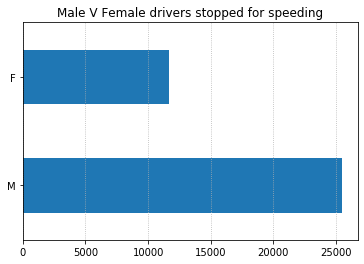

In [40]:
speed_gender_plot = police_data[police_data.violation == 'Speeding'].driver_gender.value_counts()
speed_gender_plot.plot(kind = 'barh')
plt.title("Male V Female drivers stopped for speeding")
plt.grid(axis = 'x', linestyle = 'dotted')

In [44]:
# does gender affect who gets searched during a stop?
police_data.groupby('driver_gender').search_conducted.sum()

driver_gender
F     366.0
M    2111.0
Name: search_conducted, dtype: float64

In [46]:
# number of times searches have been conducted.
police_data['search_conducted'].sum()

2477

In [48]:
# percentage probability of being searched.
(2477/61221) * 100

4.045997288512112

In [53]:
print("Probability for female drivers: ", (366/2477), "Probability for male drivers: ", (2111/2477))

Probability for female drivers:  0.14775938635446104 Probability for male drivers:  0.8522406136455389


Of all the times that a search has been conducted, 366 of the drivers were female and 2,111 were male. So chances of a search being conducted are 4.046%, and in those chances, probability of being searched for a female driver is 15% and for male drivers is 85%.

In [56]:
# What is the mean stop duration?
police_data['stop_duration'].value_counts()

0-15 Min     47201
16-30 Min    11377
30+ Min       2642
2                1
Name: stop_duration, dtype: int64

In [74]:
# since our values are objects, replace the 3 types with the means and get the total mean
import numpy as np
# use range to n+1, because range 0-> n = 0-> n-1
print("0-15 mins:", np.mean(range(0,16)), "| 16 - 30 mins:", np.mean(range(16,31)), "| 30+ mins:", np.mean(range(30,61)))

0-15 mins: 7.5 | 16 - 30 mins: 23.0 | 30+ mins: 45.0


In [89]:
police_data['average_stop_duration'] = police_data['stop_duration'].map({'0-15 Min': 7.5, '16-30 Min': 23, '30+ Min': 45})

In [91]:
police_data['average_stop_duration'].mean()

11.998832081019275

The mean stop duration is 12 minutes.

In [93]:
# compare the age distributions for each violation
police_data.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37118.0,33.262972,12.616007,15.0,23.0,30.0,42.0,88.0


From the table above we can observe that speeding is the leading cause of being stopped followed by moving violation, and the least is seat belts. The youngest person ever stopped was 15 years old and the oldest was 88.

In [101]:
police_data.head(4)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,average_stop_duration
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,7.5
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,7.5
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,7.5
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,23.0


In [ ]:
# duration of data collected(data collected from 2020 to 2015).
# race vs being stopped(majority of races, value_counts)
# race vs search
# total number of outcomes
# gender vs arrest(is_arrested = true)
# violation vs arrest
# arrest vs drug related stop
# average stop duration vs arrested
